# Лабораторна робота 4 (1 частина)

Романенко Ілля ФІТ 4-7

23 варіант

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


## Крок 1

завантажимо датасет, та проведемо попредню перевірку даних

In [72]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
dataFrame  = pd.DataFrame(X, columns=data.feature_names)
dataFrame['target'] = y

dataFrame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [73]:
dataFrame.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [74]:
dataFrame.duplicated().sum()

0

In [75]:
dataFrame.isnull().sum().sum()

0

In [76]:
dataFrame.shape

(569, 31)

In [77]:
dataFrame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Крок 2

### розділимо дані на навчальний, та тестовий набір

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Побудуємо три моделі класифікації та підберемо параметри моделі за допомогою grid search

##### логістична регресія

In [79]:
logReg = LogisticRegression(max_iter=2000, solver='liblinear')
logRegParams = {
    'C': [0.001, 0.01, 0.05, 0.09, 0.1, 0.11, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

logRegGrid = GridSearchCV(logReg, logRegParams, cv=5)
logRegGrid.fit(X_train, y_train)
logRegBest = logRegGrid.best_estimator_

print(f'найкращі параметри: {logRegGrid.best_params_}\n')

y_pred = logRegBest.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'точність: {acuracy}\n mse: {mse}\n r2: {r2}')

найкращі параметри: {'C': 0.09, 'penalty': 'l2'}

точність: 0.9912280701754386
 mse: 0.008771929824561403
 r2: 0.9626596790042581


#### дерево рішень

In [80]:
tree = DecisionTreeClassifier()
treeParams = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

treeGrid = GridSearchCV(tree, treeParams, cv=5)
treeGrid.fit(X_train, y_train)
treeBest = treeGrid.best_estimator_

print(f'найкращі параметри: {treeGrid.best_params_}\n')

y_pred = treeBest.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'точність: {acuracy}\n mse: {mse}\n r2: {r2}')

найкращі параметри: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 9}

точність: 0.9385964912280702
 mse: 0.06140350877192982
 r2: 0.7386177530298068


#### випадковий ліс

In [81]:
randFrst = RandomForestClassifier()
randFrstParams = {
    'n_estimators': [10, 50, 85, 90, 95, 100, 110, 200, 300],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

randFrstGrid = GridSearchCV(randFrst, randFrstParams, cv=5)
randFrstGrid.fit(X_train, y_train)
randFrstBest = randFrstGrid.best_estimator_

print(f'найкращі параметри: {randFrstGrid.best_params_}\n')

y_pred = randFrstBest.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'точність: {acuracy}\n mse: {mse}\n r2: {r2}')

найкращі параметри: {'max_depth': 7, 'n_estimators': 50}

точність: 0.956140350877193
 mse: 0.043859649122807015
 r2: 0.8132983950212905


## Крок 3

оцінемо моделі

### виведемо найкращі параметри

In [82]:
bestParams = {
    'model' : ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'best params': [
        logRegGrid.best_params_,
        treeGrid.best_params_,
        randFrstGrid.best_params_
    ]
}

bestParamsDataFrame = pd.DataFrame(bestParams)

bestParamsDataFrame

,model,best params
0,LogisticRegression,"{'C': 0.09, 'penalty': 'l2'}"
1,DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
2,RandomForestClassifier,"{'max_depth': 7, 'n_estimators': 50}"


### виведемо звіт про класифікацію моделі

In [84]:
models = {
    'Logarithmic Regression': logRegBest,
    'Decision Tree': treeBest,
    'Random Forest': randFrstBest
}

for model_name, model in models.items():
    print(f"модель: {model_name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('-' * 60)

модель: Logarithmic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

------------------------------------------------------------
модель: Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

------------------------------------------------------------
модель: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0

### виведемо матриці помилок

модель: Logarithmic Regression
[[42  1]
 [ 0 71]]


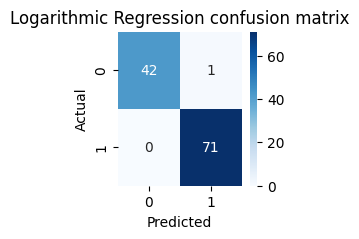

модель: Decision Tree
[[40  3]
 [ 4 67]]


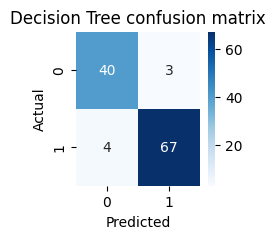

модель: Random Forest
[[40  3]
 [ 2 69]]


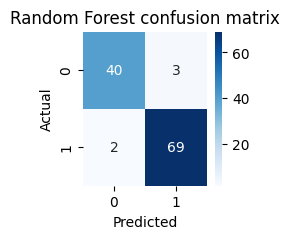

In [90]:
from sklearn.metrics import confusion_matrix

for model_name, model in models.items():
    print(f"модель: {model_name}")
    cm = confusion_matrix(y_test, model.predict(X_test))
    print(cm)

    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} confusion matrix')
    plt.show()

Отже, можемо зробити висновки, що найкраще себе показала створена логаритмічна модель. Ця модель показала достатньо чудовий результат r2 в 0.96, та точності в 0.99

## Крок 4

прогнозування і висновки

За результатими минулого кроку, ми визначили що логарифмічна модель підійшла найкраще в даному випадку.

In [93]:
logReg2 = LogisticRegression(**logRegGrid.best_params_, max_iter=2000)
logReg2.fit(X_train, y_train)

np.random.seed(42)
randomIndices = np.random.choice(X_test.shape[0], 10, replace=False)
X_random = X_test[randomIndices]
y_random_actual = y_test[randomIndices]

y_random_pred = logReg2.predict(X_random)

comparisonDataFrame = pd.DataFrame({
    'Sample Index': randomIndices,
    'Real Class': y_random_actual,
    'Predicted Class': y_random_pred
})

comparisonDataFrame

,Sample Index,Real Class,Predicted Class
0,80,0,0
1,4,1,1
2,40,1,1
3,69,1,1
4,10,1,1
5,45,1,1
6,70,0,0
7,66,0,0
8,47,1,1
9,11,0,0


Можемо переконатися на цій випадковій вибірці, що логарифмічна модель показала себе добре в передбачені результату на основі даного датасету